# **EXPLORATION DES DONNEES**

# Importation des librairies

In [1]:
# coding: utf-8

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy import stats
import scipy.stats as st
import matplotlib.lines as mlines
from scipy import stats
import statsmodels.api as sm
from pandas.api.types import CategoricalDtype

# Chargement du jeu de données nettoyé

In [2]:
data = pd.read_csv('en.openfoodfacts.org.products_clean.csv', sep = "\t")

C:\Users\kqito\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Première description du jeu de données

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112781 entries, 0 to 112780
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               112781 non-null  int64  
 1   code                     112781 non-null  object 
 2   product_name             112781 non-null  object 
 3   additives_n              112781 non-null  int64  
 4   allergens_n              112781 non-null  int64  
 5   nutriscore_grade         112781 non-null  object 
 6   nova_group               112781 non-null  float64
 7   pnns_groups_1_bis        112781 non-null  object 
 8   pnns_groups_2            112781 non-null  object 
 9   energy_100g              112492 non-null  float64
 10  fat_100g                 112781 non-null  float64
 11  saturated-fat_100g       112781 non-null  float64
 12  carbohydrates_100g       112781 non-null  float64
 13  sugars_100g              112781 non-null  float64
 14  fibe

In [ ]:
data.head(8)

,Unnamed: 0,code,product_name,additives_n,allergens_n,nutriscore_grade,nova_group,pnns_groups_1_bis,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,0,0000000274722,blanquette de volaille et son riz,2,0,b,4.0,Composite foods,One-dish meals,450.0,2.20,0.90,15.30,0.50,0.5,6.80,0.70,0.280,0
1,1,0000000491228,entremets creme brulee,4,0,b,4.0,Milk and dairy products,Dairy desserts,1952.4,15.30,11.20,75.50,69.80,0.1,6.80,0.50,0.200,2
2,2,0000005016,pesto a la roquette bio kazidomi,0,2,e,3.0,Fat and sauces,Dressings and sauces,2318.0,53.20,9.60,11.70,0.50,1.3,8.20,2.70,1.080,23
3,3,0000005018,creme d'artichaut bio kazidomi,1,1,d,3.0,Salty snacks,Salty and fatty products,1104.0,27.40,3.90,1.80,0.00,3.5,1.90,2.70,1.080,11
4,4,0000009336247,bonbons acidules raisin fraise,7,0,d,4.0,Sugary snacks,Sweets,1674.0,0.00,0.00,93.30,93.30,0.0,0.00,0.00,0.000,14
5,5,0000010206515,pate a sucre,5,0,d,4.0,Sugary snacks,Sweets,1720.0,6.42,3.53,87.86,81.67,0.0,0.03,0.10,0.040,18
6,6,0000040144078,m&m's peanut butter,1,3,e,4.0,Sugary snacks,Sweets,2360.0,30.50,18.80,51.60,51.60,0.0,0.00,2.23,0.892,36
7,7,0000050157846,heinz squeeze sauce salade cream,1,2,d,4.0,Fat and sauces,Dressings and sauces,1226.0,23.80,1.80,18.50,17.00,0.0,1.30,1.70,0.680,14


In [ ]:
print(data.columns)

Index(['Unnamed: 0', 'code', 'product_name', 'additives_n', 'allergens_n',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1_bis', 'pnns_groups_2',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')


In [ ]:
data = data.drop(['Unnamed: 0'], axis=1) # correspond aux anciens numéros de ligne (index du DataFrame initial)

In [ ]:
data.describe(include="all")

,code,product_name,additives_n,allergens_n,nutriscore_grade,nova_group,pnns_groups_1_bis,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,112781,112781,112781.000000,112781.000000,112781,112781.000000,112781,112781,112492.000000,112781.000000,112781.000000,112781.000000,112781.000000,112781.000000,112781.000000,112781.000000,112781.000000,112781.000000
unique,112781,88080,NaN,NaN,5,NaN,9,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,8715700419794,mayonnaise,NaN,NaN,d,NaN,Sugary snacks,Biscuits and cakes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,85,NaN,NaN,33075,NaN,28344,13661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.838412,0.966564,NaN,3.384905,NaN,NaN,1202.108829,15.174803,6.154851,28.671322,14.038583,1.569456,7.866792,0.914987,0.366459,9.340775
std,NaN,NaN,2.405853,1.336114,NaN,0.960264,NaN,NaN,778.540528,17.394364,8.637106,27.338999,18.818417,3.218541,7.515810,1.629604,0.668429,9.263240
min,NaN,NaN,0.000000,0.000000,NaN,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,NaN,NaN,0.000000,0.000000,NaN,3.000000,NaN,NaN,502.000000,1.900000,0.400000,3.900000,1.000000,0.000000,2.400000,0.100000,0.040000,1.000000
50%,NaN,NaN,1.000000,0.000000,NaN,4.000000,NaN,NaN,1163.000000,9.230000,2.500000,17.000000,4.200000,0.000000,6.100000,0.560000,0.224000,9.000000
75%,NaN,NaN,3.000000,2.000000,NaN,4.000000,NaN,NaN,1782.000000,24.000000,9.300000,53.850000,23.000000,2.100000,10.500000,1.200000,0.480000,16.000000


In [ ]:
print("nombre de dimensions de data: ", data.ndim)
print("forme de data: ", data.shape)
print("taille de data: ", data.size)

nombre de dimensions de data:  2
forme de data:  (112781, 18)
taille de data:  2030058


In [ ]:
print("Le DataFrame est composé de", data.shape[0], "lignes et de", data.shape[1], "colonnes.")

Le DataFrame est composé de 112781 lignes et de 18 colonnes.


In [ ]:
data = data.rename(columns = {'pnns_groups_1_bis': 'pnns_groups', 'product_name_sa':'product_name'})

In [ ]:
var_numeric = ['additives_n','nutrition-score-fr_100g', 'allergens_n'] + list(data.columns[7:15])
var_qualit = ['nutriscore_grade', 'nova_group', 'pnns_groups']

In [ ]:
data.dtypes

code                        object
product_name                object
additives_n                  int64
allergens_n                  int64
nutriscore_grade            object
nova_group                 float64
pnns_groups                 object
pnns_groups_2               object
energy_100g                float64
fat_100g                   float64
saturated-fat_100g         float64
carbohydrates_100g         float64
sugars_100g                float64
fiber_100g                 float64
proteins_100g              float64
salt_100g                  float64
sodium_100g                float64
nutrition-score-fr_100g      int64
dtype: object

In [ ]:
## Pour la variable 'nutriscore_grade'
data['nutriscore_grade'] = data['nutriscore_grade'].astype(CategoricalDtype(categories=['a', 'b', 'c', 'd', 'e'], ordered=True))
palette_nutri = sns.color_palette(['darkgreen', 'yellowgreen', 'gold', 'chocolate', 'firebrick'])

## Pour la variable 'nova_group'
data['nova_group'] = data['nova_group'].astype(CategoricalDtype(ordered=True))
palette_nova = sns.color_palette(['green', 'gold', 'orange', 'red'])

## Pour la variable 'pnns_group_1'
data['pnns_groups'] = data['pnns_groups'].astype('category')
palette_pnns = sns.color_palette("tab10")

In [ ]:
data[var_qualit].describe(include='all')

,nutriscore_grade,nova_group,pnns_groups
count,112781,112781.0,112781
unique,5,4.0,9
top,d,4.0,Sugary snacks
freq,33075,69852.0,28344


In [ ]:
data[var_numeric].describe(include='all')

,additives_n,nutrition-score-fr_100g,allergens_n,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g
count,112781.000000,112781.000000,112781.000000,112781,112492.000000,112781.000000,112781.000000,112781.000000,112781.000000,112781.000000,112781.000000
unique,NaN,NaN,NaN,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Biscuits and cakes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,13661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.838412,9.340775,0.966564,NaN,1202.108829,15.174803,6.154851,28.671322,14.038583,1.569456,7.866792
std,2.405853,9.263240,1.336114,NaN,778.540528,17.394364,8.637106,27.338999,18.818417,3.218541,7.515810
min,0.000000,-15.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,NaN,502.000000,1.900000,0.400000,3.900000,1.000000,0.000000,2.400000
50%,1.000000,9.000000,0.000000,NaN,1163.000000,9.230000,2.500000,17.000000,4.200000,0.000000,6.100000
75%,3.000000,16.000000,2.000000,NaN,1782.000000,24.000000,9.300000,53.850000,23.000000,2.100000,10.500000


# ANALYSES UNIVARIEES

In [ ]:
print(data.columns)

Index(['code', 'product_name', 'additives_n', 'allergens_n',
       'nutriscore_grade', 'nova_group', 'pnns_groups', 'pnns_groups_2',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')


## Variables qualitatives

In [ ]:
data[var_qualit].describe(include='all')

,nutriscore_grade,nova_group,pnns_groups
count,112781,112781.0,112781
unique,5,4.0,9
top,d,4.0,Sugary snacks
freq,33075,69852.0,28344


In [ ]:
## Pour une variable qualitative

def analyses_univariees_quali(data, var, palette):
  ## Tableau de fréquence
  d = pd.DataFrame(data[var].value_counts(normalize=True))
  print(d)
  ## Diagramme en secteurs
  plt.rcParams["figure.figsize"] = (5, 5)
  data[var].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=90, colors=palette)
  plt.axis('equal')
  plt.title('Diagramme en secteurs de ' + var)
  plt.ylabel('')
  labels = data[var].index 
  plt.legend(labels, loc = 'upper right')
  plt.show()

     nova_group
4.0    0.619360
3.0    0.254405
1.0    0.108219
2.0    0.018017


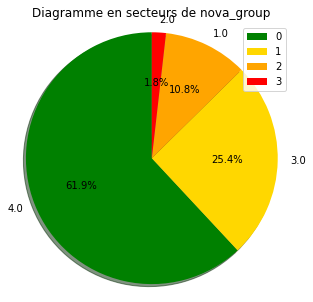

In [ ]:
analyses_univariees_quali(data, 'nova_group', palette_nova)

   nutriscore_grade
d          0.293267
c          0.217723
e          0.197338
a          0.160178
b          0.131494


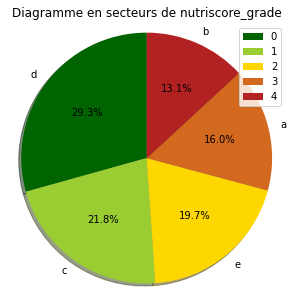

In [ ]:
analyses_univariees_quali(data, 'nutriscore_grade', palette_nutri) 

                         pnns_groups
Sugary snacks               0.251319
Milk and dairy products     0.141229
Cereals and potatoes        0.117786
Composite foods             0.108892
Fish Meat Eggs              0.099795
Salty snacks                0.072964
Fruits and vegetables       0.072964
Beverages                   0.068088
Fat and sauces              0.066962


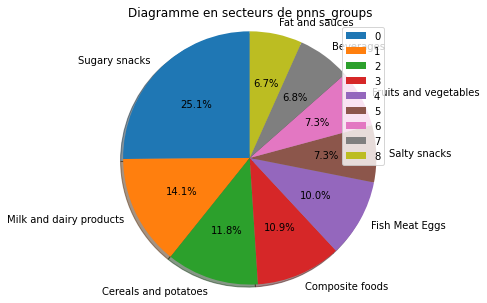

In [ ]:
analyses_univariees_quali(data, 'pnns_groups', palette_pnns)

In [ ]:
## Histogramme
def histo_quali(palette, data, var):
  plt.rcParams["figure.figsize"] = (20, 10)
  sns.set(style="white", rc={"axes.grid":True})
  ax = sns.countplot(x=var, data=data, saturation = 1, palette=palette)
  total = float(len(data)) 
  for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3,'{:1.2f}'.format(height/total),ha="center") 
  ax.set_title('Histogramme de ' + var)
  ax = ax.set(xlabel=var, ylabel='Nombre produits')

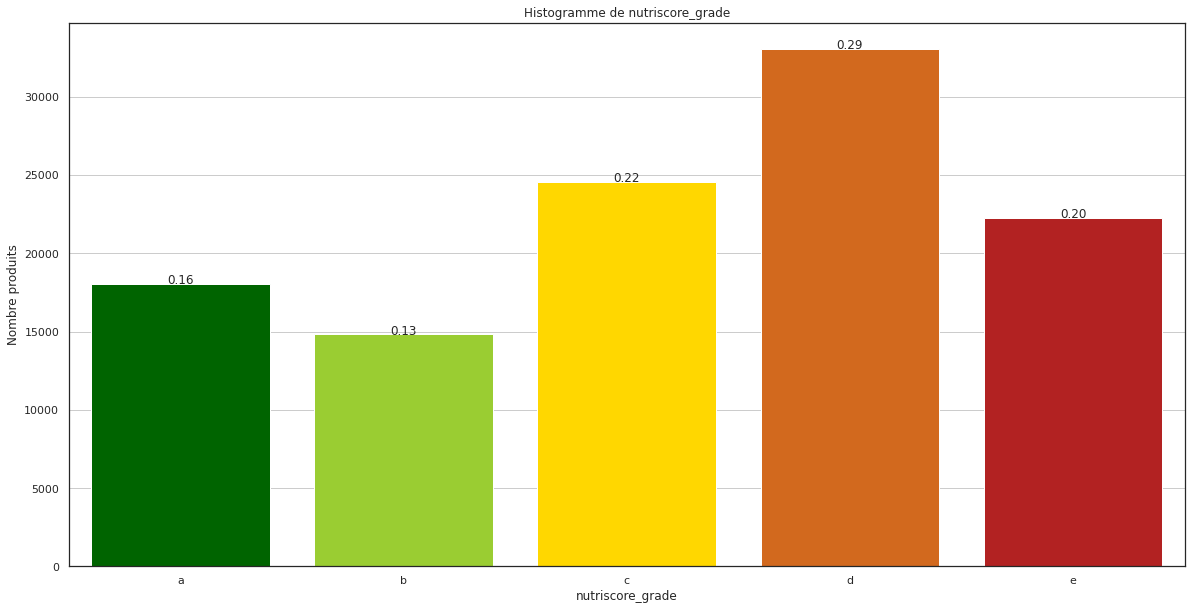

In [ ]:
histo_quali(palette_nutri, data, 'nutriscore_grade')

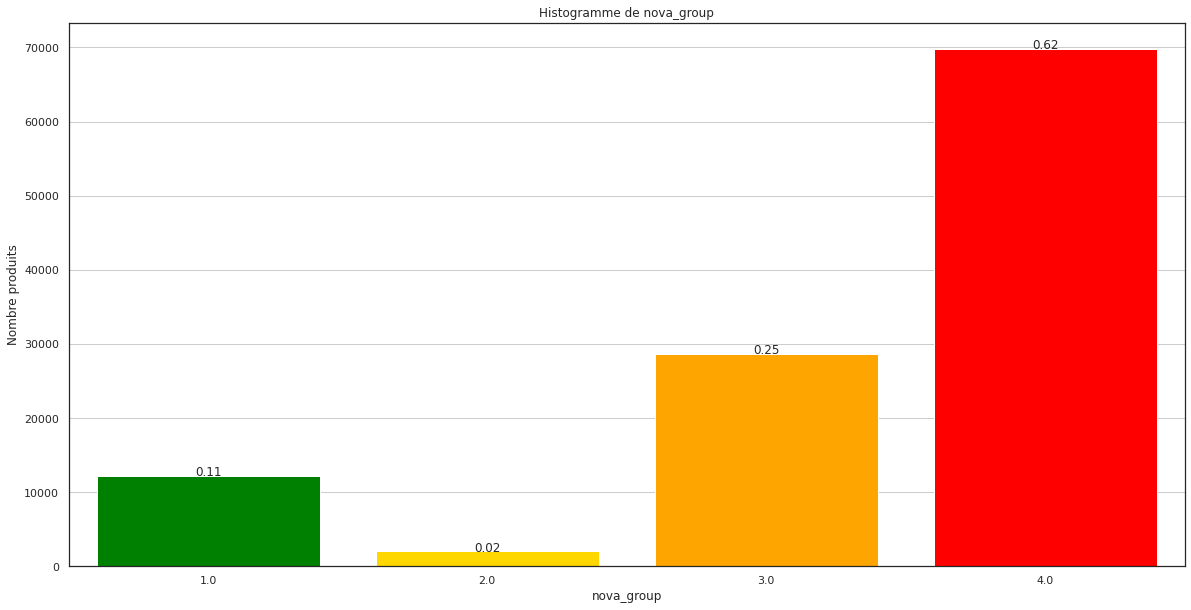

In [ ]:
histo_quali(palette_nova, data, 'nova_group')

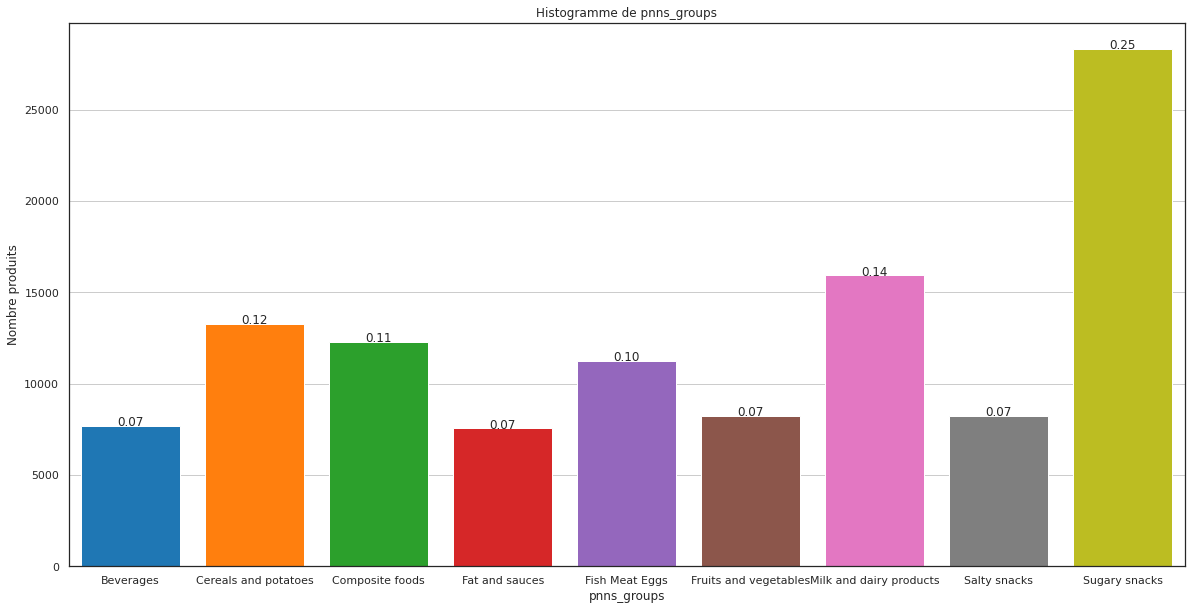

In [ ]:
histo_quali(palette_pnns, data, 'pnns_groups')

## Variables quantitatives

In [ ]:
data[var_numeric].describe(include='all')

,additives_n,nutrition-score-fr_100g,allergens_n,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g
count,112781.000000,112781.000000,112781.000000,112781,112492.000000,112781.000000,112781.000000,112781.000000,112781.000000,112781.000000,112781.000000
unique,NaN,NaN,NaN,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Biscuits and cakes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,13661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.838412,9.340775,0.966564,NaN,1202.108829,15.174803,6.154851,28.671322,14.038583,1.569456,7.866792
std,2.405853,9.263240,1.336114,NaN,778.540528,17.394364,8.637106,27.338999,18.818417,3.218541,7.515810
min,0.000000,-15.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,NaN,502.000000,1.900000,0.400000,3.900000,1.000000,0.000000,2.400000
50%,1.000000,9.000000,0.000000,NaN,1163.000000,9.230000,2.500000,17.000000,4.200000,0.000000,6.100000
75%,3.000000,16.000000,2.000000,NaN,1782.000000,24.000000,9.300000,53.850000,23.000000,2.100000,10.500000


### Définition des fonctions

In [ ]:
## Encadrement théorique de la moyenne et de la variance théorique ie intervalle de confiance à 95%

def encadrement_moy_var_theo (data1, c):
  xbar = np.mean(data1[c])
  sprime = np.std(data1[c], ddof=1)
  n_data1 = len(data1)
  sprime2 = np.var(data1[c], ddof=1)
  alpha = 0.05
  
  icinf=xbar-st.t.ppf(1-alpha/2,n_data1-1)*sprime/math.sqrt(n_data1)
  icsup=xbar+st.t.ppf(1-alpha/2,n_data1-1)*sprime/math.sqrt(n_data1)
  print("La moyenne théorique de", c, "est comprise entre", round(icinf,2), "et", round(icsup,2))
  
  icinf = (n_data1-1)*sprime2/st.chi2.ppf(1-alpha/2,n_data1-1)
  icsup = (n_data1-1)*sprime2/st.chi2.ppf(alpha/2,n_data1-1)
  print("La variance théorique de", c, "est comprise entre", round(icinf,2), "et", round(icsup,2))

In [ ]:
## Pour une variable numérique

def analyses_univariees_quanti(data1, var) :
  print('Moyenne de', var, ':', data1[var].mean())
  print('Variance de', var, ': ', data1[var].var(ddof=0))
  encadrement_moy_var_theo (data1, var)
  print('Médiane de', var, ':', data1[var].median())
  print('Mode de', var, ': ', data1[var].mode())
  print('Ecart-type de', var, ':', data1[var].std(ddof=0))
  print('Skewness de', var, ':', data1[var].skew())
  print('Kurtosis de', var, ':', data1[var].kurtosis())
  print('Boxplot de', var, ':')
  sns.set_theme(style="whitegrid")
  ax = sns.boxplot(x=data1[var])  
  plt.show()

In [ ]:
def indice_de_gini(data1, var):
  dep = data1[var].dropna()
  n = len(dep)
  lorenz = np.cumsum(np.sort(dep)) / dep.sum()
  lorenz = np.append([0],lorenz)
  plt.axes().axis('equal')
  xaxis = np.linspace(0-1/n,1+1/n,n+1)
  plt.plot(xaxis,lorenz,drawstyle='steps-post')
  plt.plot([0,1], [0,1], color='r', alpha=0.5)
  plt.axis([-0.2, 1, -0.1, 1.1])
  plt.title('Courbe de Lorenz de ' + var)
  plt.show()
  
  AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n
  S = 0.5 - AUC
  gini = 2*S
  print('Indice de Gini de', var, 'est :', gini)

In [ ]:
def distibution(data, var):
  xbar=data[var].mean()
  plt.rcParams["figure.figsize"] = (20, 8)
  sns.distplot(data[var], kde_kws={"color": "k", "lw": 2, "label": "KDE"}).set_title('Plot et distribution de ' + var)
  plt.axvline(xbar, color='r', linewidth=2)
  plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique")])

### Analyse du score de nutrition

In [ ]:
plt.rcParams["figure.figsize"] = (10, 6)

Moyenne de nutrition-score-fr_100g : 9.340775485232442
Variance de nutrition-score-fr_100g :  85.80684668318511
La moyenne théorique de nutrition-score-fr_100g est comprise entre 9.29 et 9.39
La variance théorique de nutrition-score-fr_100g est comprise entre 85.1 et 86.52
Médiane de nutrition-score-fr_100g : 9.0
Mode de nutrition-score-fr_100g :  0    0
dtype: int64
Ecart-type de nutrition-score-fr_100g : 9.263198512564928
Skewness de nutrition-score-fr_100g : 0.14748630476139257
Kurtosis de nutrition-score-fr_100g : -1.015386220855135
Boxplot de nutrition-score-fr_100g :


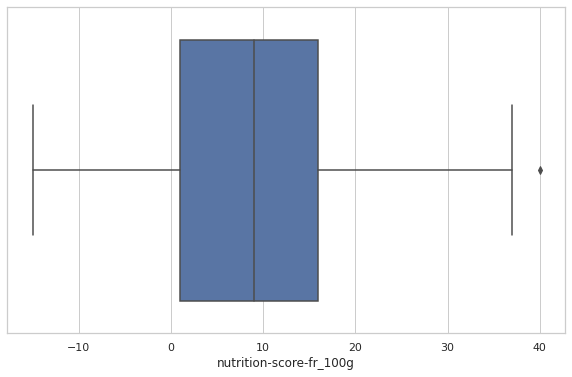

In [ ]:
analyses_univariees_quanti(data, 'nutrition-score-fr_100g')

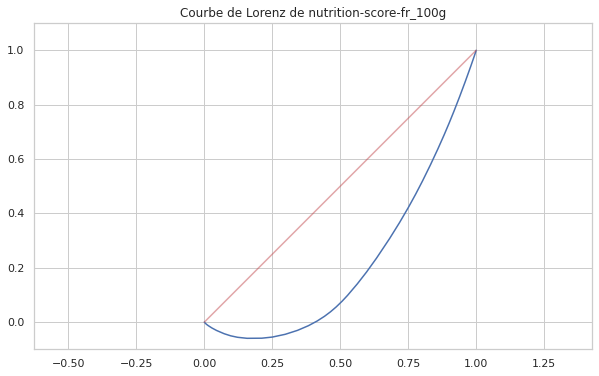

Indice de Gini de nutrition-score-fr_100g est : 0.5697121149463472


In [ ]:
indice_de_gini(data, 'nutrition-score-fr_100g')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


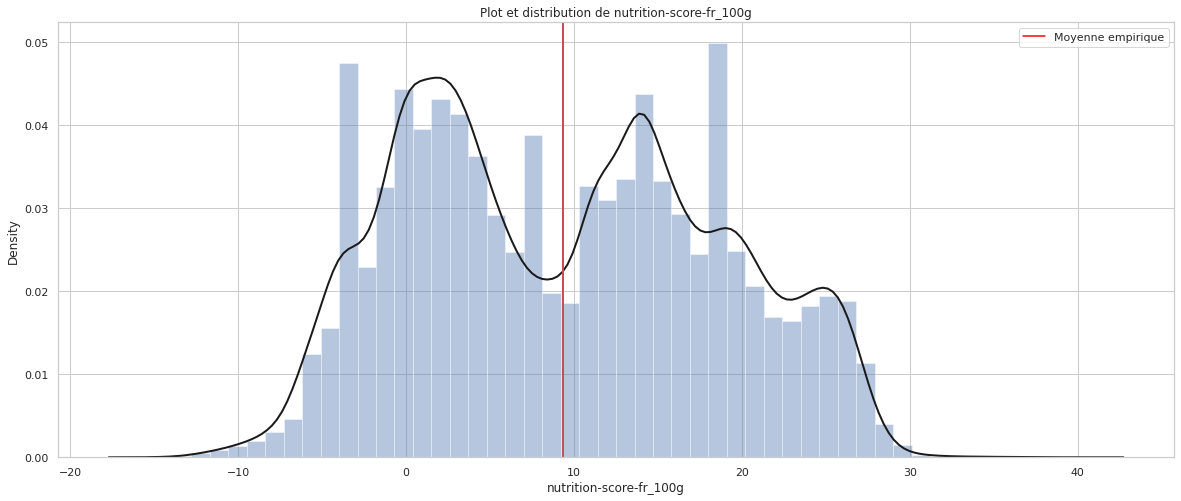

In [ ]:
distibution(data, 'nutrition-score-fr_100g')

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


Text(0.5, 1.0, 'Densité de la variable du Nutriscore grade')

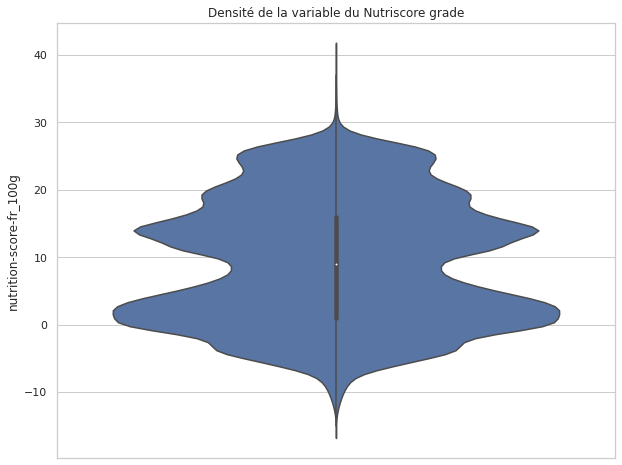

In [ ]:
plt.rcParams["figure.figsize"] = (10, 8)
sns.violinplot(y = "nutrition-score-fr_100g", data = data, orient="h").set_title('Densité de la variable du Nutriscore grade')

*Test de normalité*

La distribution du ''nutrition-score-fr_100g' montre une distribution bimodale. On peut donc tester cette hypothèse avec des tests statistiques.

In [ ]:
## Test de Shapiro
from scipy.stats import shapiro
shapiro(data['nutrition-score-fr_100g'])

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9688852429389954, 0.0)

In [ ]:
## Test de Kolmogorov-Smirnov
from scipy.stats import kstest
kstest(data['nutrition-score-fr_100g'], cdf='norm')

KstestResult(statistic=0.7271368170946559, pvalue=0.0)

La p-value étant proche à 0, on peut rejetter l'hypothèse nulle de normalité des données.

Les tests de normalité montrent que le score de nutrition ne respecte pas l'hypothèse de normalité de certains tests statistiques mais au vu du grand nombre de données, on peut utiliser ces tests pour analyser les données (échantillon > 30, théorème des grands nombres).


### Analyse du nombre d'additfs

Moyenne de additives_n : 1.8384124985591546
Variance de additives_n :  5.788078039514822
La moyenne théorique de additives_n est comprise entre 1.82 et 1.85
La variance théorique de additives_n est comprise entre 5.74 et 5.84
Médiane de additives_n : 1.0
Mode de additives_n :  0    0
dtype: int64
Ecart-type de additives_n : 2.40584248019583
Skewness de additives_n : 2.0610378327841015
Kurtosis de additives_n : 6.411909867108582
Boxplot de additives_n :


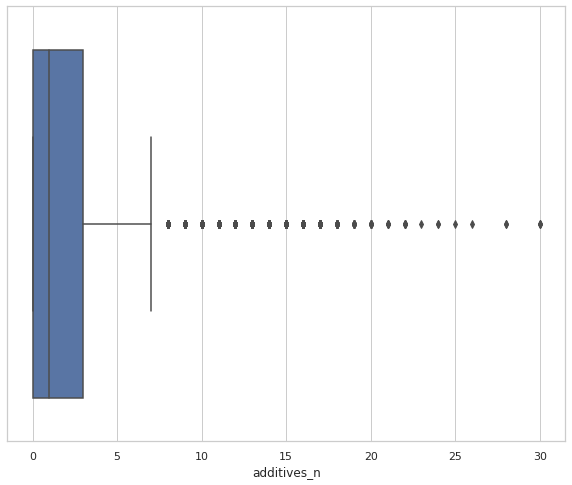

In [ ]:
analyses_univariees_quanti(data, 'additives_n')

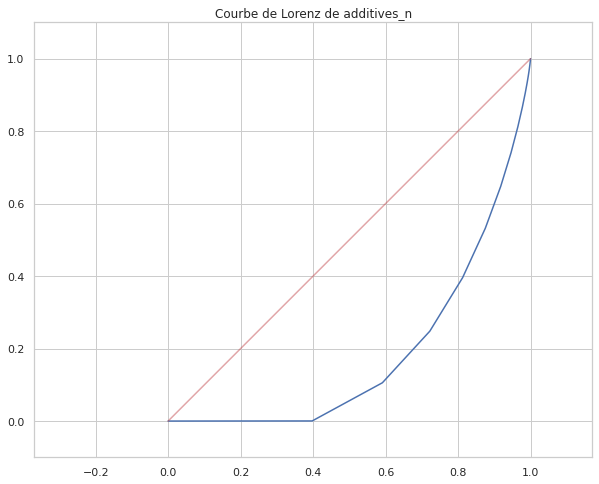

Indice de Gini de additives_n est : 0.6353732465993729


In [ ]:
indice_de_gini(data, 'additives_n')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


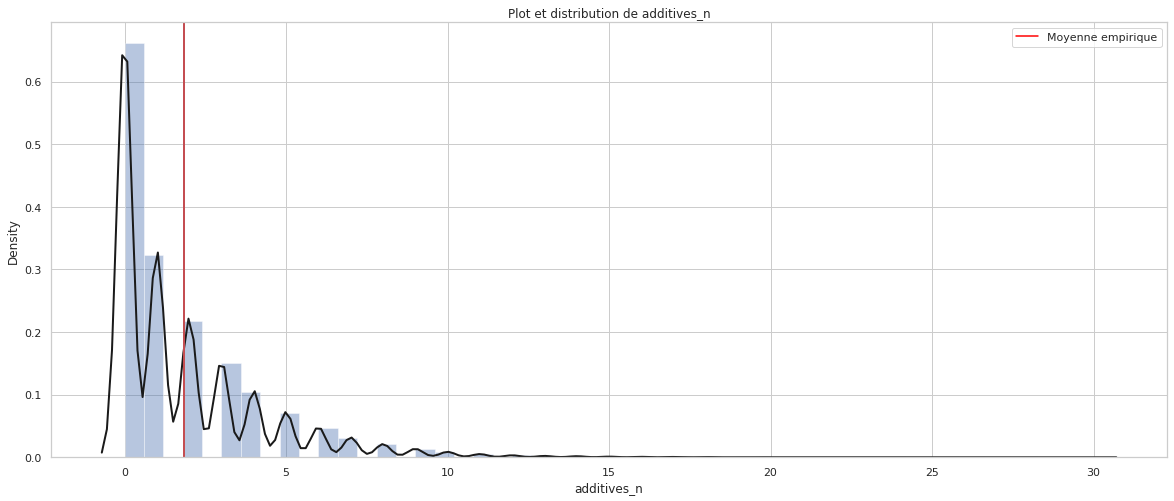

In [ ]:
distibution(data, 'additives_n')

Text(0.5, 1.0, "Densité de la variable du nombre d'additifs")

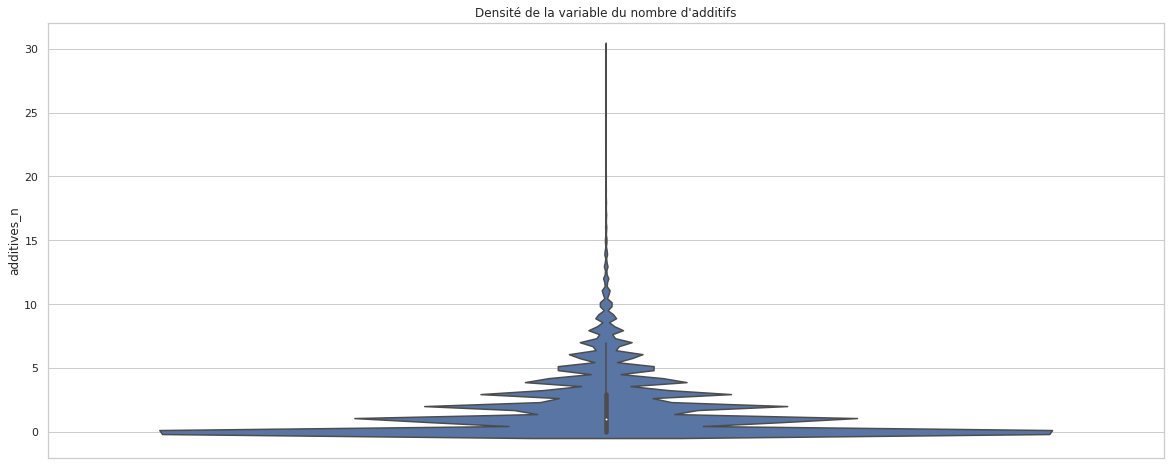

In [ ]:
sns.violinplot(y = "additives_n", data = data).set_title('Densité de la variable du nombre d\'additifs')

### Analyse du nombre d'allergènes

Moyenne de allergens_n : 0.9665635169044431
Variance de allergens_n :  1.785184658959875
La moyenne théorique de allergens_n est comprise entre 0.96 et 0.97
La variance théorique de allergens_n est comprise entre 1.77 et 1.8
Médiane de allergens_n : 0.0
Mode de allergens_n :  0    0
dtype: int64
Ecart-type de allergens_n : 1.3361080266804308
Skewness de allergens_n : 1.7550712986717352
Kurtosis de allergens_n : 6.2379405849396665
Boxplot de allergens_n :


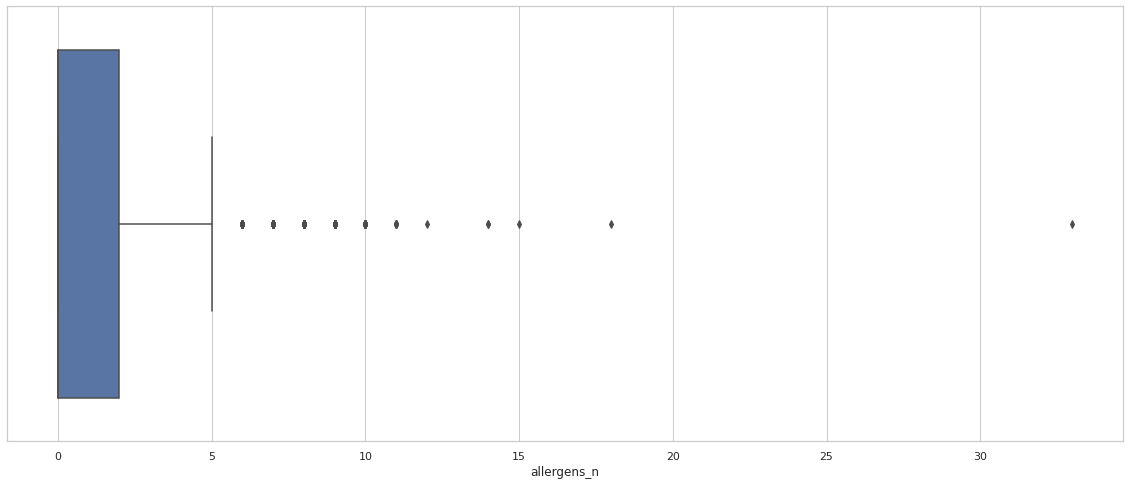

In [ ]:
analyses_univariees_quanti(data, 'allergens_n')

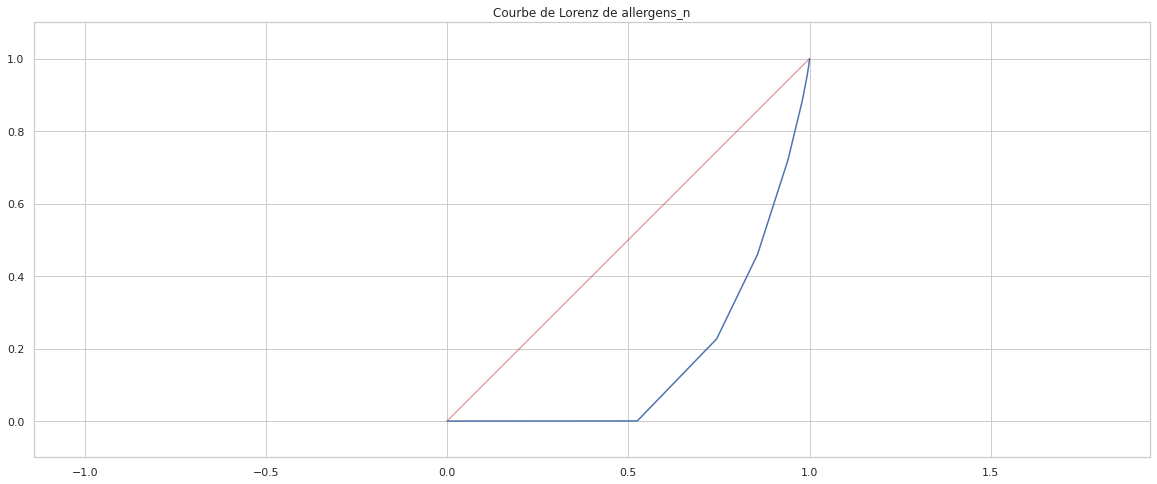

Indice de Gini de allergens_n est : 0.6729312813175244


In [ ]:
indice_de_gini(data, 'allergens_n')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


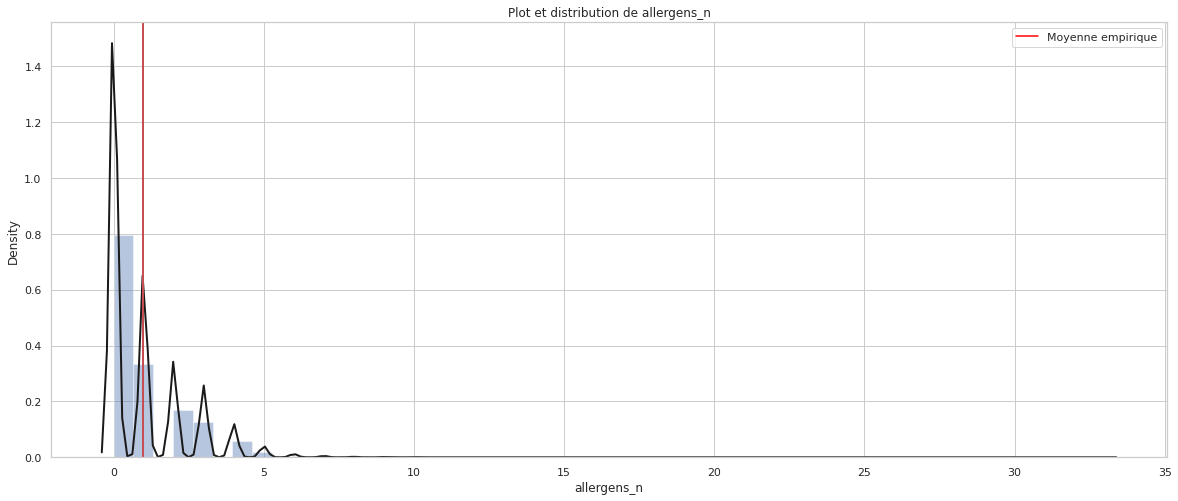

In [ ]:
distibution(data, 'allergens_n')

Text(0.5, 1.0, "Densité de la variable du nombre d'allergènes")

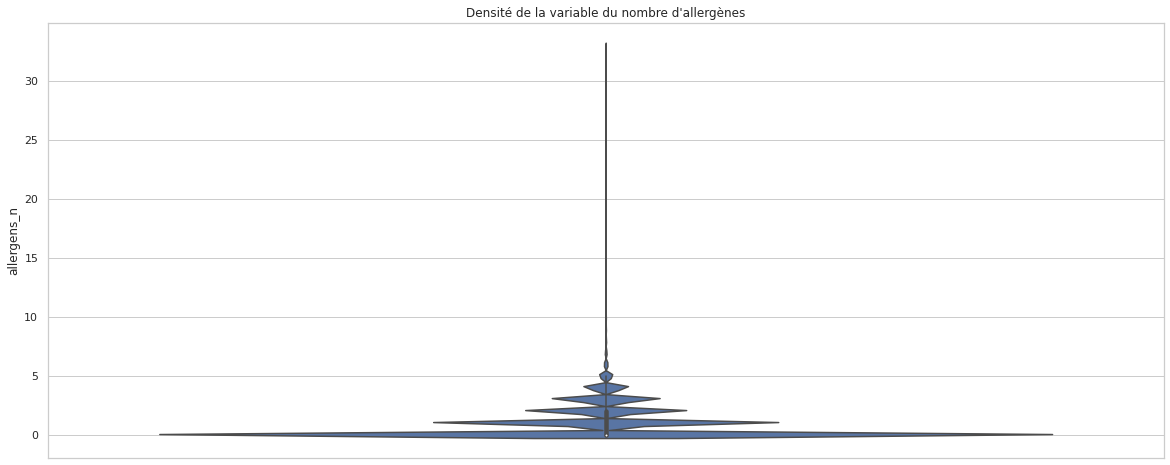

In [ ]:
sns.violinplot(y = "allergens_n", data = data).set_title('Densité de la variable du nombre d\'allergènes')

### Valeurs nutritionnelles

In [ ]:
print(data.columns)

Index(['code', 'product_name', 'additives_n', 'allergens_n',
       'nutriscore_grade', 'nova_group', 'pnns_groups', 'pnns_groups_2',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')


In [ ]:
data.iloc[:, 8:17].describe(include='all')

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
count,112492.000000,112781.000000,112781.000000,112781.000000,112781.000000,112781.000000,112781.000000,112781.000000,112781.000000
mean,1202.108829,15.174803,6.154851,28.671322,14.038583,1.569456,7.866792,0.914987,0.366459
std,778.540528,17.394364,8.637106,27.338999,18.818417,3.218541,7.515810,1.629604,0.668429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,502.000000,1.900000,0.400000,3.900000,1.000000,0.000000,2.400000,0.100000,0.040000
50%,1163.000000,9.230000,2.500000,17.000000,4.200000,0.000000,6.100000,0.560000,0.224000
75%,1782.000000,24.000000,9.300000,53.850000,23.000000,2.100000,10.500000,1.200000,0.480000
max,4180.000000,100.000000,100.000000,100.000000,100.000000,100.000000,92.000000,100.000000,49.987200


Text(0.5, 1.0, 'Boxplot des quantités en nutriments')

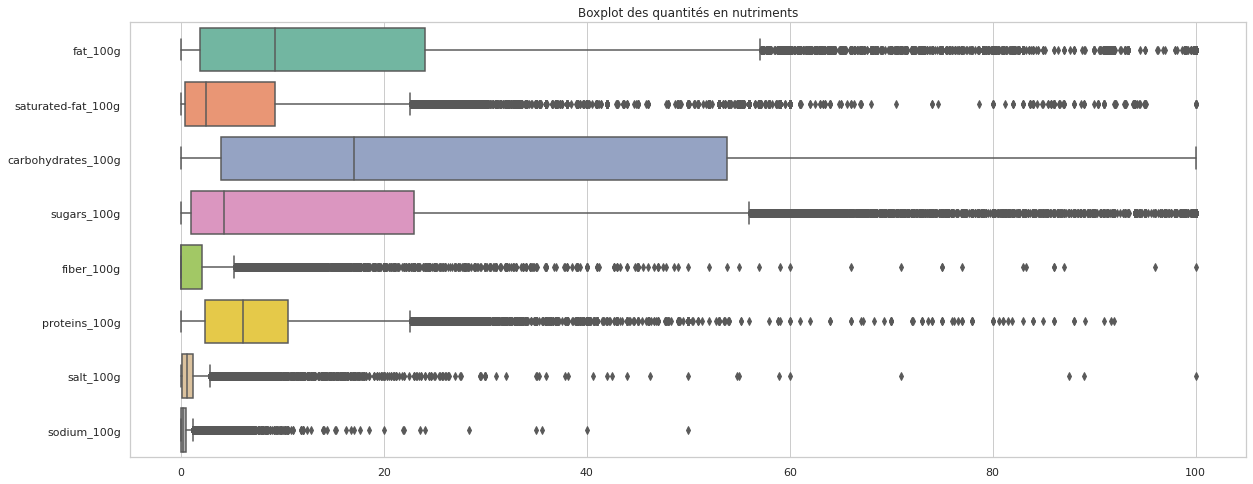

In [ ]:
sns.boxplot(data=data[data.columns[9:17]], orient="h", palette="Set2").set_title('Boxplot des quantités en nutriments')

Text(0.5, 1.0, "Violin plot de l'énergie en kJ")

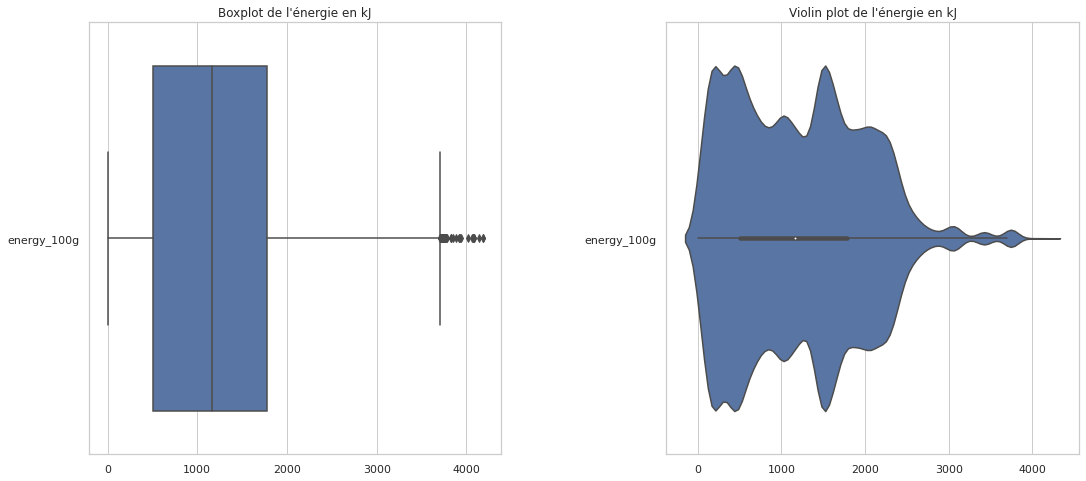

In [ ]:
plt.figure(1,figsize=(10,12))
plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1.5,
                          top = 0.7, wspace = 0.4, hspace = 0.4)

plt.subplot(1,2,1)
sns.boxplot(data=data[['energy_100g']], orient="h").set_title('Boxplot de l\'énergie en kJ')

plt.subplot(1,2,2)
sns.violinplot(data=data[['energy_100g']], orient="h").set_title('Violin plot de l\'énergie en kJ')

# ANALYSES BIVARIEES

L'idée d'application à tester ici est d'évaluer la qualité des produits alimentaires en se basant sur :
  * la qualité nutritionnelle du produit donnée par les 2 variables du **Nutriscore**
  * la quantité d'**additifs**
  * le nombre d'**allergènes**
  * le degré de transformation des produits donné par la classification **NOVA**

## Définition des fonctions

### Analyse entre 2 variables quantitatives

In [ ]:
## Diagramme de dispersion entre 2 variables quantitatives

def diagramme_dipersion(X, Y, data):
  plt.plot(data[X],data[Y],'o',alpha=0.5)
  plt.xlabel(X)
  plt.ylabel(Y)
  plt.title("Diagramme de dispersion")
  plt.show()

In [ ]:
## Analyse bivariée entre 2 variables quantitatives : Régression linéaire

def coeff_stat(X, Y, data):
  print("Corrélation de Pearson :", st.pearsonr(data[X],data[Y])[0])
  np.cov(data[X],data[Y],ddof=0) # matrice de corrélation  
  sns.jointplot(x = X, y = Y, data = data, kind = "reg")
  plt.suptitle("Diagramme de dispersion et droite de régression linéaire")

### Analyse entre une variable quantitative et une variable qualitative

In [ ]:
## Boxplot d'une variable quantitative en fonction des modalités de la variable qualitative

def graphe_uni_quanti_quali(X, Y, data, categories):
  modalites = categories
  groupes = []
  for m in modalites:
    groupes.append(data[data[X]==m][Y])
  
  medianprops = {'color':"black"}
  meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
  plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
  plt.title('Boxplot et moyennes de ' + Y + ' par catégories de ' + X)
  plt.show()

In [ ]:
## Analyse bivariée entre une variable quantitative et qualitative : ANOVA

def eta_squared(X, Y, data):
  x = data[X]
  y = data[Y]
  moyenne_y = y.mean()
  classes = []
  for classe in x.unique():
    yi_classe = y[x==classe]
    classes.append({'ni': len(yi_classe),
                    'moyenne_classe': yi_classe.mean()})
  SCT = sum([(yj-moyenne_y)**2 for yj in y])
  SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
  return '=Rapport de corrélation n² =', SCE/SCT

### Analyse entre 2 variables qualitatives

In [ ]:
## Analyse bivariée entre 2 variables qualitatives : Test du Chi2 et Tableau de contingence

def test_Chi2(data, X, Y):
  cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total", fill_value=0)
  print('Tableau de contingence')
  display(cont)
  st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
  print('Statistique de test :', st_chi2)
  print('Nombre de ddl :', st_dof)
  print('p-value :', st_p)
  print('Tableau des fréquences obtenues:')

In [ ]:
def tableau_contingence(data, X, Y):
  sns.heatmap(pd.crosstab(data[X], data[Y]), annot=True)
  plt.title("Tableau de contingence coloré")
  plt.show()

## Relation entre 'nutrition-score-fr_100g' et 'nutriscore_grade'

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


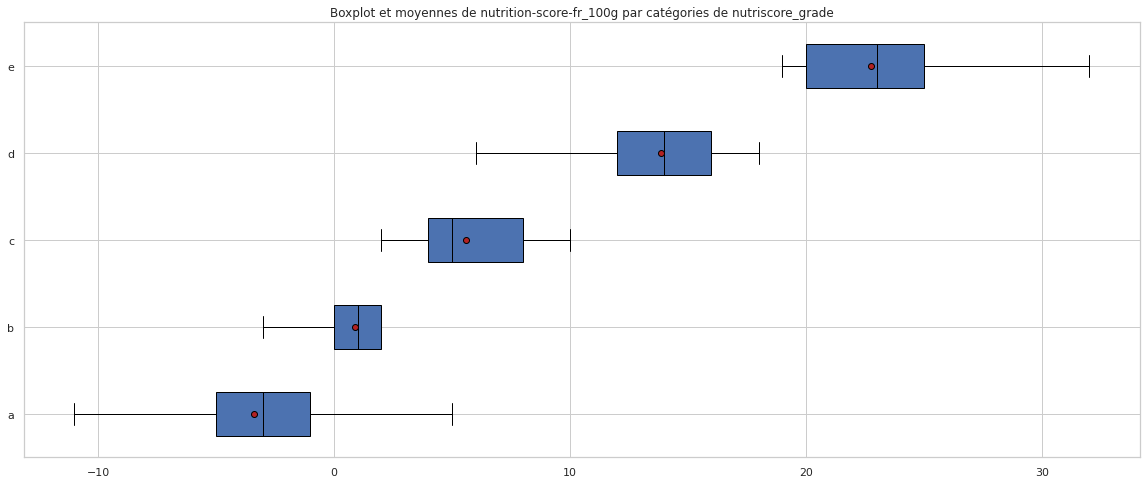

In [ ]:
Y = 'nutrition-score-fr_100g' # quanti
X = 'nutriscore_grade' # quali

categories = ['a', 'b', 'c', 'd', 'e']
graphe_uni_quanti_quali(X, Y, data, categories)

In [ ]:
## Analyse d'une relation entre une variable qualitative et quantitative : ANOVA
eta_squared(X, Y, data)

('=Rapport de corrélation n² =', 0.931057868957788)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


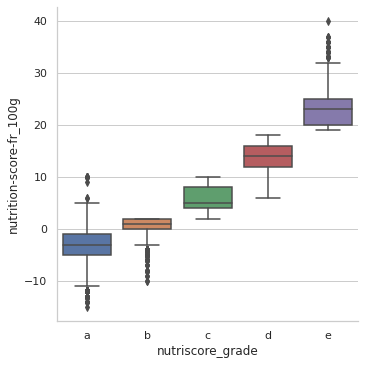

In [ ]:
sns.factorplot(x = X, y = Y, data = data, kind = "box")

On obtient un résultat supérieur à 0.9, ce qui laisse à penser qu'il y a effectivement une très forte corrélation entre le score de nutrition et le nutriscore grade. 

On observe sur le graphique que les valeurs les plus élevées de 'nutrition-score-fr_100g' ont tendance à être corrélées avec la catégorie 'e' du nutriscore_grade'.

## Relation entre 'nutrition-score-fr_100g' et 'pnns_groups'

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


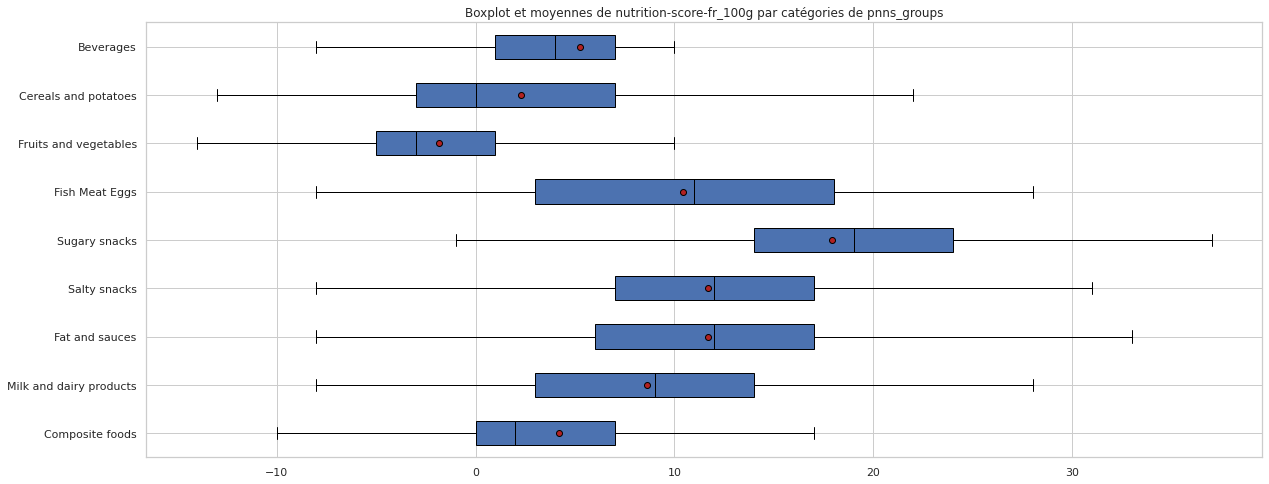

In [ ]:
Y = 'nutrition-score-fr_100g' # quanti
X = 'pnns_groups' # quali

categories = data[X].unique()
graphe_uni_quanti_quali(X, Y, data, categories)

In [ ]:
## Analyse d'une relation entre une variable qualitative et quantitative : ANOVA
eta_squared(X, Y, data)

('=Rapport de corrélation n² =', 0.4477621949300052)

On obtient un résultat proche de 0.6, ce qui laisse à penser qu'il y a une corrélation entre les 2 variables.

Le 'nutrition-score-fr_100g' a tendance à être élevé pour les produits 'Sugary snacks', 'Salty snacks', 'Fat and sauces' et 'Fish Meat Eggs'.

## Relations entre 'nova_group' et 'additives_n'

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


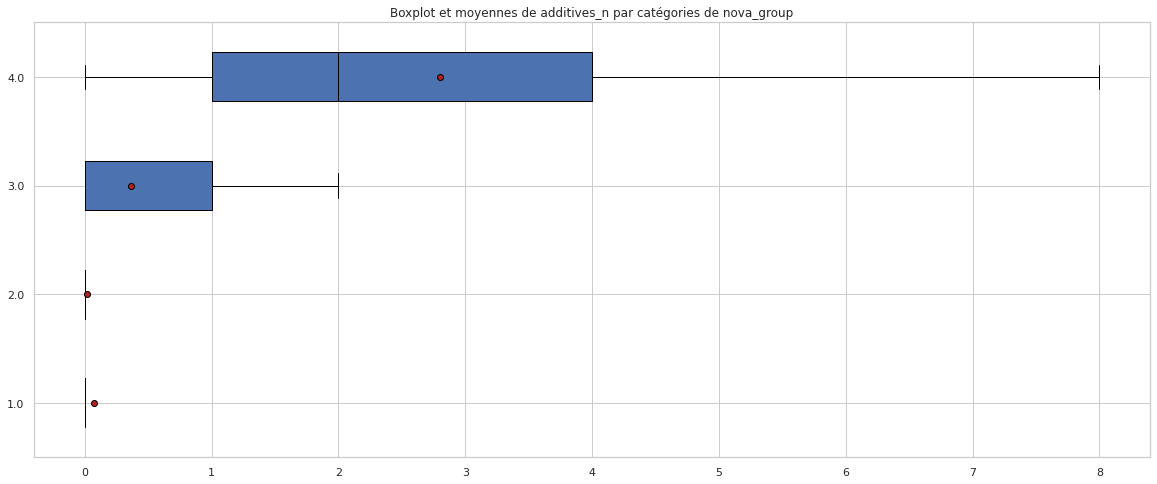

In [ ]:
Y = 'additives_n' # quanti
X = 'nova_group' # quali

categories = [1.0, 2.0, 3.0, 4.0]
graphe_uni_quanti_quali(X, Y, data, categories)

In [ ]:
## Analyse d'une relation entre une variable qualitative et quantitative : ANOVA
eta_squared(X, Y, data)

('=Rapport de corrélation n² =', 0.26337181489441314)

Le résultat est proche de 0.3. Les 2 variables tendent à être corrélées, avec les produits de catégorie 4.0 qui ont tendance à avoir un nombre élevé d'additifs.

## Relations entre 'allergens_n' et 'additives_n'

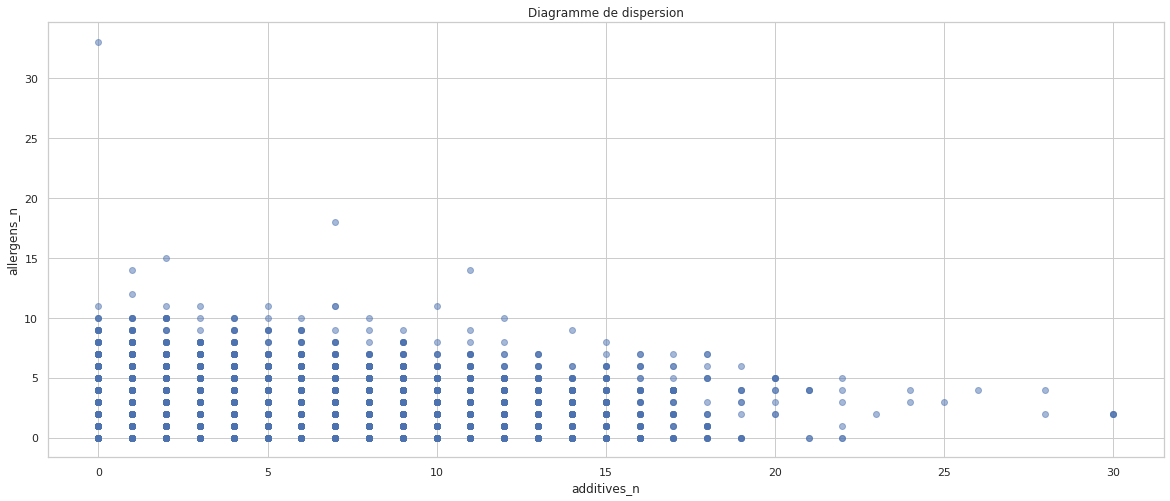

In [ ]:
X = 'additives_n'
Y = 'allergens_n'

diagramme_dipersion(X, Y, data)

Corrélation de Pearson : 0.2705444616773509


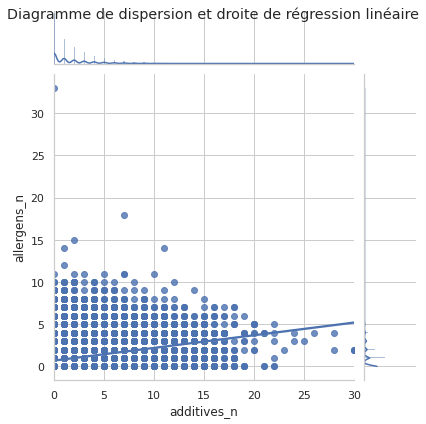

In [ ]:
## Analyse entre 2 variables quantitatives : Régression linéaire
coeff_stat(X, Y, data)

La corrélation entre les 2 variables est proche de 0.3. Les 2 variables tendent à être corrélées en une relation positive.

## Relations entre 'nutrition-score-fr_100g' et 'additives_n'

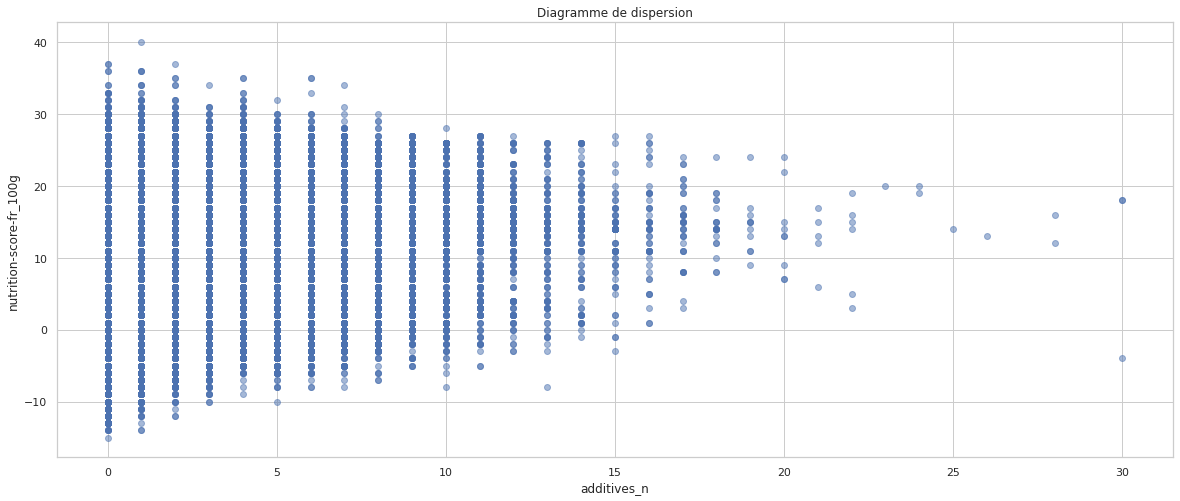

In [ ]:
X = 'additives_n'
Y = 'nutrition-score-fr_100g'

diagramme_dipersion(X, Y, data)

Corrélation de Pearson : 0.21206860660557073


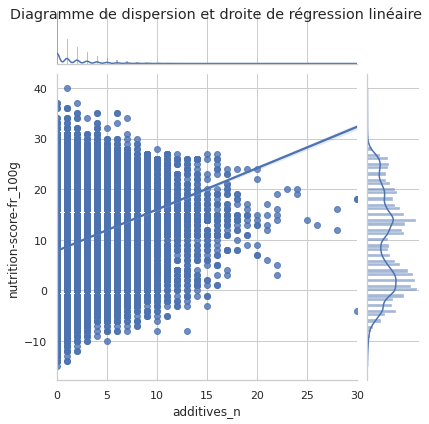

In [ ]:
## Analyse entre 2 variables quantitatives : Régression linéaire
coeff_stat(X, Y, data)

La corrélation entre les 2 variables est de 0.21. Les 2 variables tendent à être corrélées en une relation positive.

## Relation entre 'nova_group' et 'pnns_groups'

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Histogramme de pnns_groups en fonction de nova_group')

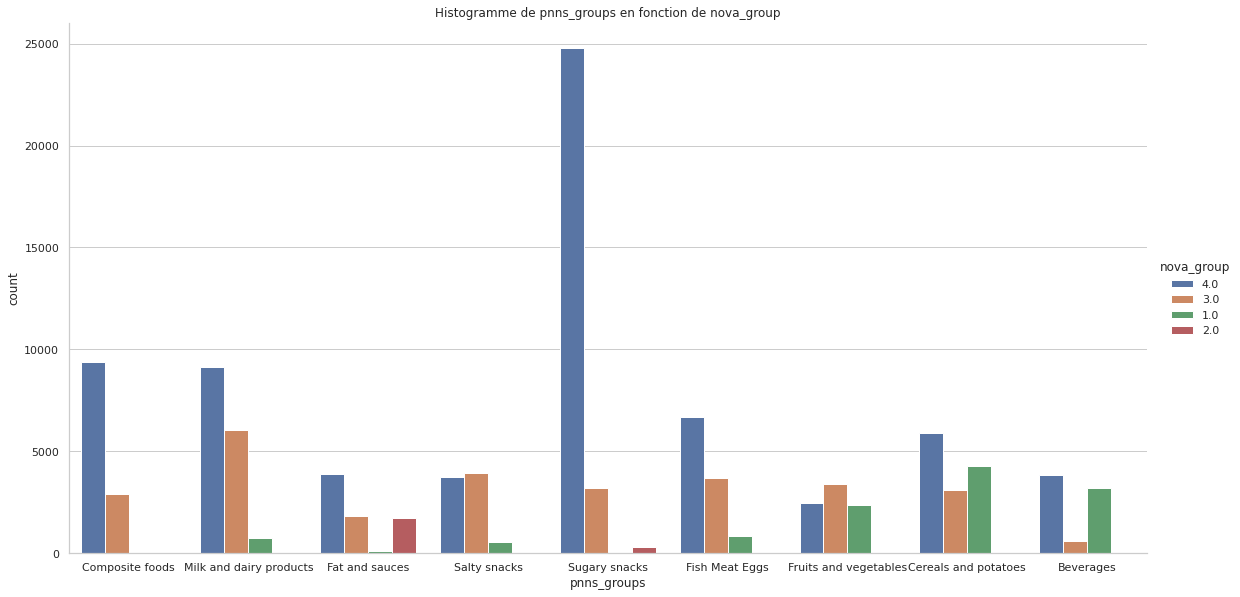

In [ ]:
X = 'pnns_groups'
Y = 'nova_group'

data['pnns_groups'] = data['pnns_groups'].astype(str)
data['nova_group'] = data['nova_group'].astype(str)

sns.factorplot(x = X, hue = Y, data = data, kind = "count", size=8, aspect=2)
plt.title('Histogramme de pnns_groups en fonction de nova_group')

In [ ]:
## 2 variables qualitatives : test du Chi2
test_Chi2(data, X, Y)

Tableau de contingence


nova_group,1.0,2.0,3.0,4.0,Total
pnns_groups,,,,,
Beverages,3209,1,610,3859,7679
Cereals and potatoes,4271,2,3096,5915,13284
Composite foods,0,0,2894,9387,12281
Fat and sauces,111,1719,1819,3903,7552
Fish Meat Eggs,857,1,3711,6686,11255
Fruits and vegetables,2374,3,3407,2445,8229
Milk and dairy products,751,1,6029,9147,15928
Salty snacks,573,14,3916,3726,8229
Sugary snacks,59,291,3210,24784,28344


Statistique de test : 53341.21265783992
Nombre de ddl : 36
p-value : 0.0
Tableau des fréquences obtenues:


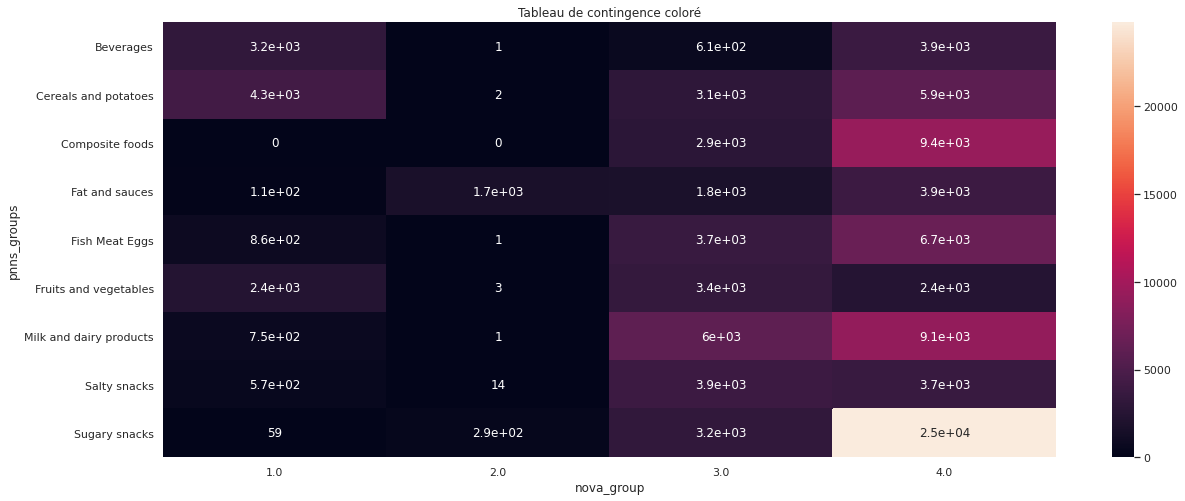

In [ ]:
tableau_contingence(data, X, Y)

On observe une corrélation entre la catégorie 'Sugary snacks' de 'pnns_group' et '4.0' de 'nova_group'

## Relation entre 'nutriscore_grade' et 'pnns_groups'

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Histogramme de nutriscore_grade en fonction de nova_group')

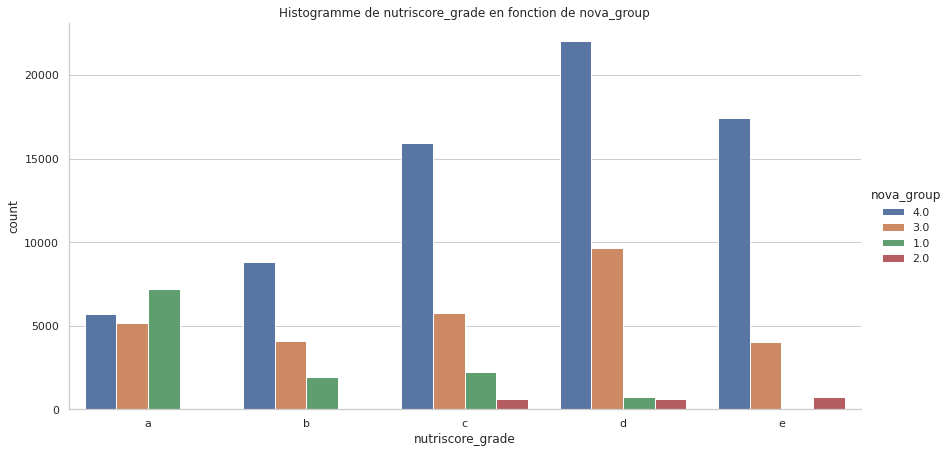

In [ ]:
X = 'nutriscore_grade'
Y = 'nova_group'

data['nutriscore_grade'] = data['nutriscore_grade'].astype(CategoricalDtype(ordered=True))
data['nova_group'] = data['nova_group'].astype(str)

sns.factorplot(x = X, hue = Y, data = data, kind = "count", size=6, aspect=2)
plt.title('Histogramme de nutriscore_grade en fonction de nova_group')

In [ ]:
## 2 variables qualitatives : test du Chi2
test_Chi2(data, X, Y)

Tableau de contingence


nova_group,1.0,2.0,3.0,4.0,Total
nutriscore_grade,,,,,
a,7203,22,5159,5681,18065
b,1925,12,4088,8805,14830
c,2253,619,5748,15935,24555
d,762,626,9663,22024,33075
e,62,753,4034,17407,22256
Total,12205,2032,28692,69852,112781


Statistique de test : 24242.66430502669
Nombre de ddl : 20
p-value : 0.0
Tableau des fréquences obtenues:


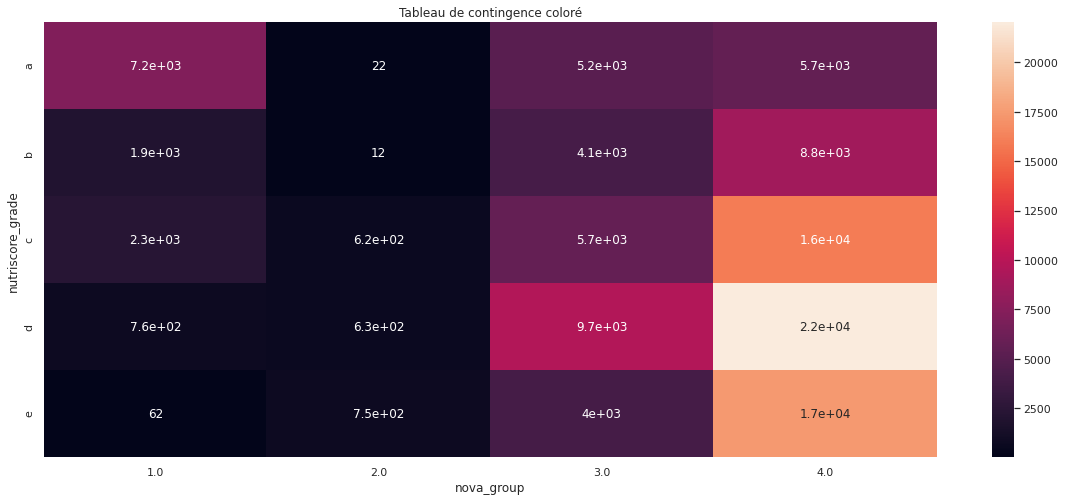

In [ ]:
tableau_contingence(data, X, Y)

On observe une corrélation entre les catégories 'c', 'd', 'e' du 'nutriscore_grade' avec la catégorie '4.0' du 'nova_group'.

# REDUCTION DIMENSIONNELLE

On peut réaliser une Analyse en Composantes Principales (ACP) sur les variables quantitatives du DataFrame, soit : 

'additives_n', 'allergens_n', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g'

In [ ]:
from matplotlib.collections import LineCollection

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

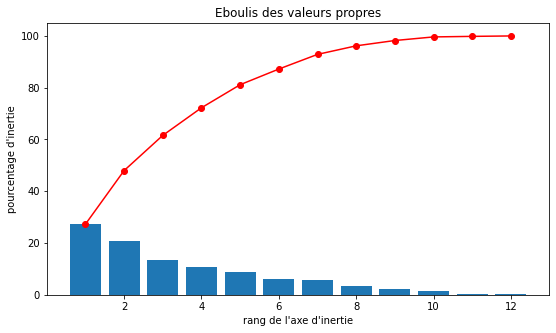

In [ ]:
from sklearn import decomposition
from sklearn import preprocessing

# choix du nombre de composantes à calculer
# n_comp = 9
n_comp = 12

# selection des colonnes à prendre en compte dans l'ACP
data_pca = data[['additives_n', 'allergens_n', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 
                 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g']]

# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean()) # pour 20 lignes de 'energy_100g'
X = data_pca.values
features = data_pca.columns

# Centrage et Réduction
X_scaled = preprocessing.StandardScaler().fit(X).transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
plt.rcParams["figure.figsize"] = (9, 5)
display_scree_plot(pca)

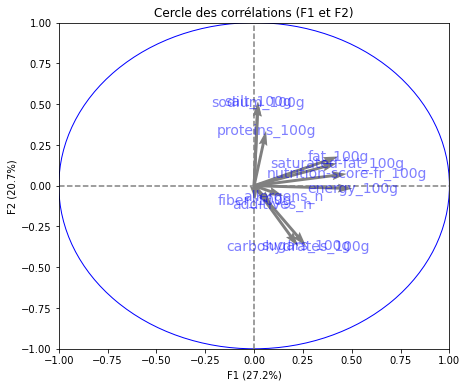

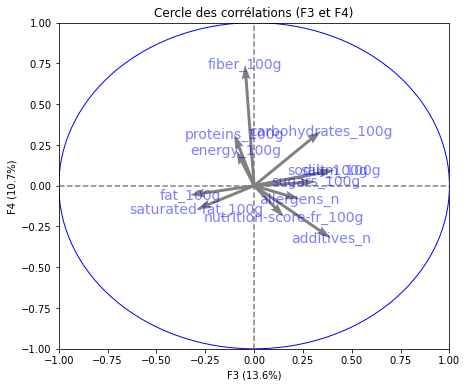

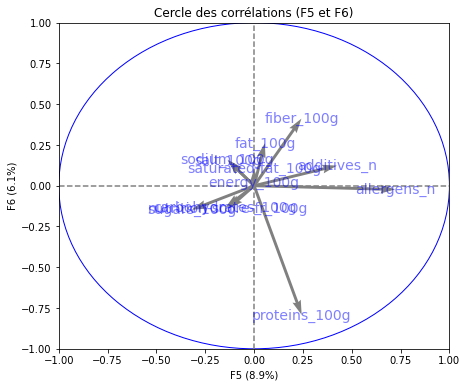

In [ ]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3), (4, 5)], labels = np.array(features))

Le 1er plan factoriel représente les sources d'énergie des produits : le 1er axe avec les graisses, l'énergie, le nutriscore et le 2eme axe avec le sel et les protéines qui contribuent positivement et les glucides qui contribuent négativement.

Le 2eme plan factoriel est plus difficile à interpréter avec les fibres qui contribuent fortement au 4ème axe et beaucoup de variables sur le 3ème axe : glucides, additifs, sel et graisses

Le 3ème plan factoriel présente les fibres qui contribuent négativement au 6ème axe et les allergènes positivement au 5ème axe.

# NOTATION

In [ ]:
print(data.columns)

Index(['code', 'product_name', 'additives_n', 'allergens_n',
       'nutriscore_grade', 'nova_group', 'pnns_groups', 'pnns_groups_2',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')


In [ ]:
## Pour la variable 'nutriscore_grade'
data['nutriscore_grade'] = data['nutriscore_grade'].astype(CategoricalDtype(categories=['a', 'b', 'c', 'd', 'e'], ordered=True))
palette_nutri = sns.color_palette(['darkgreen', 'yellowgreen', 'gold', 'chocolate', 'firebrick'])

## Pour la variable 'nova_group'
data['nova_group'] = data['nova_group'].astype(CategoricalDtype(ordered=True))
palette_nova = sns.color_palette(['green', 'gold', 'orange', 'red'])

## Pour la variable 'pnns_group_1'
data['pnns_groups'] = data['pnns_groups'].astype('category')
palette_pnns = sns.color_palette("tab10")

In [ ]:
data[['additives_n', 'allergens_n']].describe(include='all')

,additives_n,allergens_n
count,112781.000000,112781.000000
mean,1.838412,0.966564
std,2.405853,1.336114
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,3.000000,2.000000
max,30.000000,33.000000


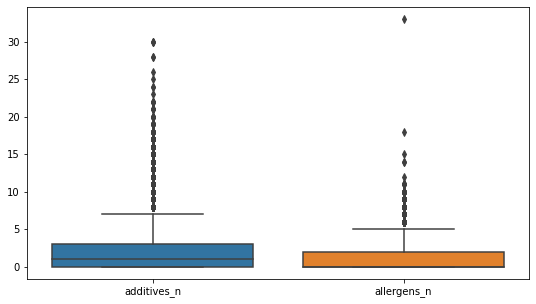

In [ ]:
sns.boxplot(data=data[['additives_n', 'allergens_n']])

In [ ]:
## Définition des fonctions pour l'attribution des points

def score_nutri(data, i):
  N = 0
  if data['nutriscore_grade'][i] == 'a':
    N = 60
  elif data['nutriscore_grade'][i] == 'b':
    N = 45
  elif data['nutriscore_grade'][i] == 'c':
    N = 30
  elif data['nutriscore_grade'][i] == 'd':
    N = 15
  else :
    N = 5
  return N

def score_nova(data, i):
  NG = 0
  if data['nova_group'][i] == '1.0':
    NG = 40
  elif data['nova_group'][i] == '2.0':
    NG = 40
  elif data['nova_group'][i] == '3.0':
    NG = 30
  else :
    NG = 15
  return NG

def score_additives(data, i): # int('allergens_n'*1.2)
  AD = 0
  if data['additives_n'][i] == 0:
    AD = 0
  elif data['additives_n'][i] == 1:
    AD = 1
  elif data['additives_n'][i] in range(2, 4):
    AD = 2
  elif  data['additives_n'][i] in range(4, 9):
    AD = 4
  elif  data['additives_n'][i] in range(9, 16):
    AD = 8
  elif  data['additives_n'][i] in range(16, 21):
    AD = 10
  else:
    AD = 15
  return AD

def score_allergens(data, i): # int('additives_n'*1.2)
  AD = 0
  if data['allergens_n'][i] == 0:
    AL = 0
  elif data['allergens_n'][i] == 1:
    AL = 1
  elif data['allergens_n'][i] == 2:
    AL = 2
  elif  data['allergens_n'][i] in range(3, 6):
    AL = 4
  elif  data['allergens_n'][i] in range(6, 11):
    AL = 8
  elif  data['allergens_n'][i] in range(11, 16):
    AL = 10
  else:
    AL = 15
  return AL

In [ ]:
## Calcul d'une note basée sur 'nutriscore_grade', 'additives_n', 'allergens_n', 'nova_group'

def note(data):
  Note = []
  for i in range(len(data)):
    N = score_nutri(data, i) + score_nova(data, i) - score_additives(data, i) - score_allergens(data, i)
    Note.append(N)
  return Note

data['Note_produit'] = note(data)

Text(0.5, 1.0, 'Boxplot de la note du produit')

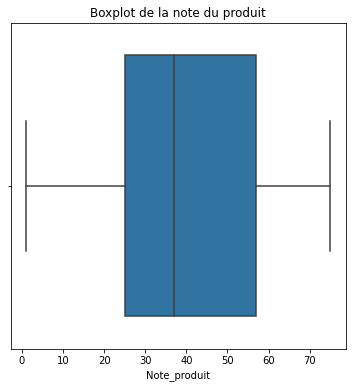

In [ ]:
plt.rcParams["figure.figsize"] = (6, 6)
sns.boxplot(x=data['Note_produit']).set_title("Boxplot de la note du produit")

In [ ]:
data['Note_produit'].describe(include='all')

count    112781.000000
mean         39.919392
std          19.707967
min           1.000000
25%          25.000000
50%          37.000000
75%          57.000000
max          75.000000
Name: Note_produit, dtype: float64

Text(0.5, 1.0, 'Boxplot de la note du produit')

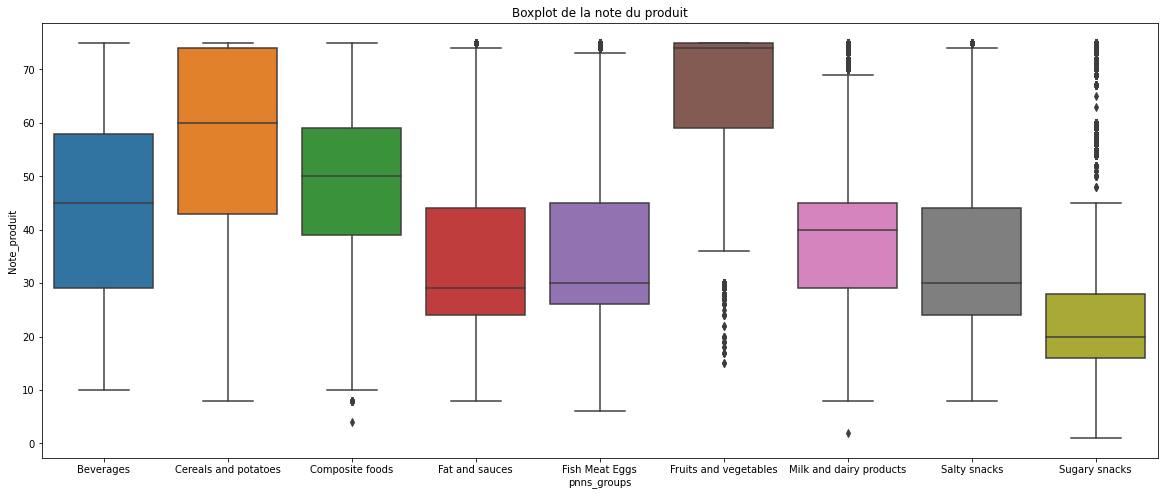

In [ ]:
plt.rcParams["figure.figsize"] = (20, 8)
sns.boxplot(x="pnns_groups", y="Note_produit", data=data).set_title("Boxplot de la note du produit")

In [ ]:
## Création d'un incide de qualité

def indice_qualite(data):
  Indice = []
  for i in range(len(data)):
    if data['Note_produit'][i] >= 60:
      I = 'bon produit'
    if data['Note_produit'][i] in range(30, 60):
      I = 'produit correct'
    if data['Note_produit'][i] < 30:
      I = 'mauvais produit'

    Indice.append(I)
  return Indice

In [ ]:
data['indice_qualite'] = indice_qualite(data)
data['indice_qualite'] = data['indice_qualite'].astype(CategoricalDtype(categories=['bon produit', 'produit correct', 'mauvais produit'], ordered=True))

Text(0.5, 1.0, 'Boxplot de la note du produit')

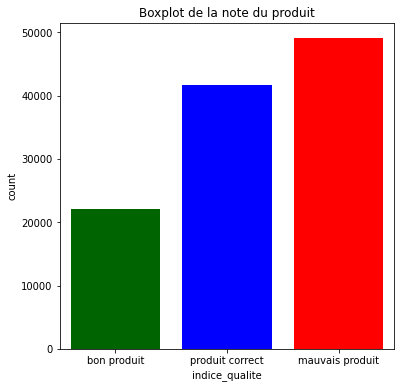

In [ ]:
plt.rcParams["figure.figsize"] = (6, 6)
sns.countplot(x = "indice_qualite", data = data, saturation = 1, palette = sns.color_palette(['darkgreen', 'blue', 'red'])).set_title("Boxplot de la note du produit")

In [ ]:
data['indice_qualite'].describe(include='all')

count              112781
unique                  3
top       mauvais produit
freq                49036
Name: indice_qualite, dtype: object

Text(0.5, 1.0, 'Boxplot de la qualité du produit')

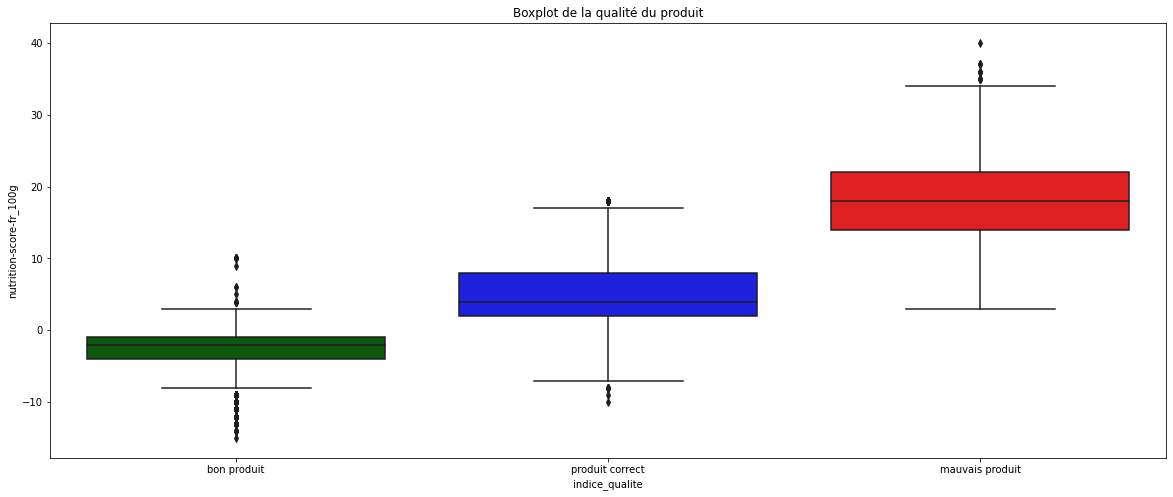

In [ ]:
plt.rcParams["figure.figsize"] = (20, 8)
sns.boxplot(x="indice_qualite", y="nutrition-score-fr_100g", data=data, palette = sns.color_palette(['darkgreen', 'blue', 'red'])).set_title("Boxplot de la qualité du produit")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


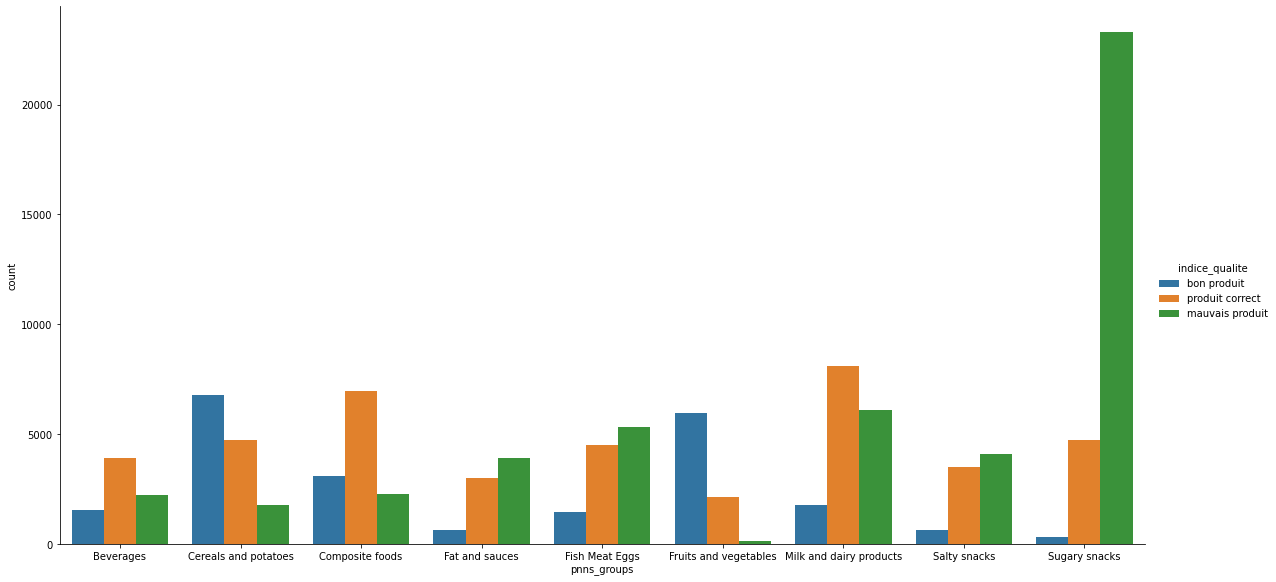

In [ ]:
sns.factorplot(x = "pnns_groups", hue = "indice_qualite", data = data, kind = "count", size=8, aspect=2)

In [ ]:
df_small = data[['additives_n', 'allergens_n', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g','proteins_100g', 
                 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g', 'Note_produit']]
df_small.corr()[['Note_produit']].sort_values(by='Note_produit', ascending=False)

,Note_produit
Note_produit,1.000000
fiber_100g,0.230981
proteins_100g,-0.066421
sodium_100g,-0.183975
salt_100g,-0.188296
carbohydrates_100g,-0.221265
allergens_n,-0.251928
additives_n,-0.321030
sugars_100g,-0.418327
fat_100g,-0.480774


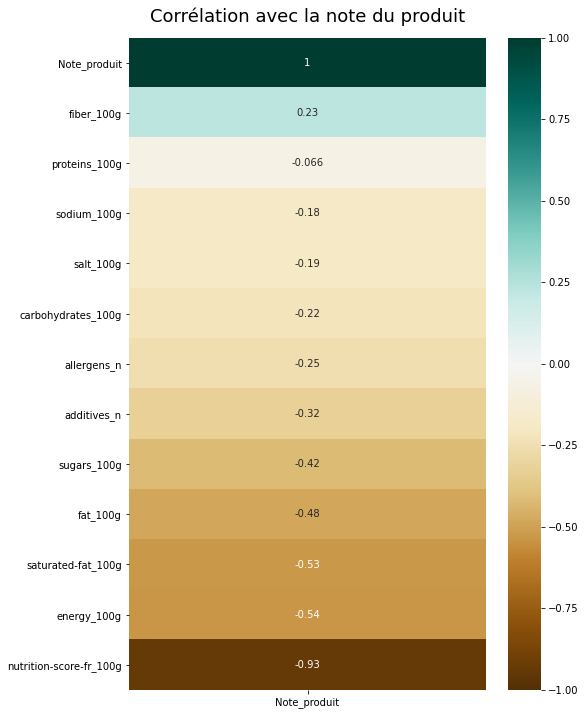

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_small.corr()[['Note_produit']].sort_values(by='Note_produit', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Corrélation avec la note du produit', fontdict={'fontsize':18}, pad=16);

La note des produits est corrélée négativement avec les variables 'nutrition-score-fr_100g', 'energy_100g', 'additives_n', 'sugars_100g', 'saturated-fat_100g'.
Plus les produits sont énergétiques, sucrés, gras et ont beaucoup d'additifs avec un score de nutrition élevé, plus la notation va diminuer.

In [ ]:
# Projection des individus sur le 1er plan factoriel

alpha = 0.5
illustrative_var = list(data['indice_qualite'])
illustrative_legend = 'indice_qualite'
d1 = 0
d2 = 1
color = ['darkgreen','red', 'blue']
X_projected = pca.transform(X_scaled)
 
fig = plt.figure(figsize=(7,6))
i = 0

illustrative_var = np.array(illustrative_var)
for value in np.unique(illustrative_var):
  selected = np.where(illustrative_var == value)
  plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value, c = color[i])
  i = i+1
plt.legend()

plt.xlim([-10,10])
plt.ylim([-10,60])
        
plt.plot([-100, 100], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-100, 100], color='grey', ls='--')

plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
plt.show(block=False)

La projection des individus sur le 1er plan factoriel en fonction de l'indice de qualité des produits semble ne pas montrer de différence entre les 3 catégories.